In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- Load your JSON training log ---
log_path = "results/results_20250526_200142.json"  # ? Change to your actual JSON file path
with open(log_path, "r") as f:
    records = json.load(f)
# Extract per-condition C-indices into a DataFrame
cidx_df = pd.DataFrame(
    [entry["c_indices_per_condition"] for entry in records],
    index=[entry["epoch"] for entry in records]
)
prauc_df = pd.DataFrame(
    [entry["pr_auc_per_condition"] for entry in records],
    index=[entry["epoch"] for entry in records]
)
chosen = ["Essential hypertension", "Other specified conditions associated with the spine (intervertebral disc displacement)",
    "Osteoporosis","Diabetes mellitus, type unspecified",
    "Non-alcoholic fatty liver disease","Coronary atherosclerosis",
    "Malignant neoplasms of breast"
]
# Convert to DataFrame and sort by epoch
df = pd.DataFrame(records)
df = df.sort_values("epoch")
df.head(20)

,final_train_loss,final_val_link_loss,final_val_link_auc,final_val_pr_auc,final_val_cox_loss,c_indices_per_condition,pr_auc_per_condition,mean_c_index,epoch,NEGATIVE_MULTIPLIER,timestamp
0,0.396140,2.152127,0.511122,0.347438,2.679687,"[0.4519646573118968, 0.4895311093475885, 0.479...","[0.346752727875856, 0.41203019865763507, 0.363...",0.467306,1,2,2025-05-26T17:01:14.626160
1,0.308915,2.644214,0.559920,0.386520,5.001641,"[0.4310968661293102, 0.47158913813383685, 0.38...","[0.3678395362390525, 0.42595484993502974, 0.42...",0.460360,2,2,2025-05-26T17:02:04.565058
2,0.283483,2.332134,0.550571,0.383544,4.798314,"[0.44710443983361536, 0.5119394679434236, 0.39...","[0.3708277641573038, 0.42652400763068143, 0.38...",0.469715,3,2,2025-05-26T17:02:57.222551
3,0.263838,2.313396,0.533549,0.378926,4.460349,"[0.4585530436406621, 0.5281335831855647, 0.382...","[0.35054769504777467, 0.4061783447595534, 0.41...",0.475168,4,2,2025-05-26T17:03:44.656967
4,0.249885,2.101218,0.512240,0.364496,3.978087,"[0.4608120398819, 0.5301551168159477, 0.403966...","[0.34482521144041905, 0.3838268992326286, 0.36...",0.470138,5,2,2025-05-26T17:04:31.859402
5,0.242561,2.389605,0.498403,0.352775,6.470984,"[0.4548858022652786, 0.5093724195177624, 0.417...","[0.32611375572228696, 0.3831750362337034, 0.39...",0.476665,6,2,2025-05-26T17:05:19.747089
6,0.240952,2.296569,0.526885,0.367846,5.435468,"[0.4753391977157416, 0.5329193411922567, 0.406...","[0.34595513466467354, 0.39981912172803097, 0.3...",0.474227,7,2,2025-05-26T17:06:16.909263
7,0.227169,2.470381,0.496801,0.355074,7.598677,"[0.4505531381601274, 0.509654739628917, 0.4177...","[0.33321828581670654, 0.3642515626671782, 0.38...",0.471938,8,2,2025-05-26T17:07:03.247274
8,0.223412,2.354732,0.474983,0.339575,7.781751,"[0.4569932162354833, 0.4870272788606495, 0.429...","[0.31293731634316807, 0.3613375444859586, 0.40...",0.462665,9,2,2025-05-26T17:07:49.716376
9,0.216030,2.238031,0.491549,0.354180,7.661890,"[0.4588978404010358, 0.5079868263418428, 0.429...","[0.3333778563790546, 0.386576351585984, 0.3961...",0.476220,10,2,2025-05-26T17:08:40.404721


In [3]:
len(df)

200

# --- 1) Plot Train vs. Val Losses ---

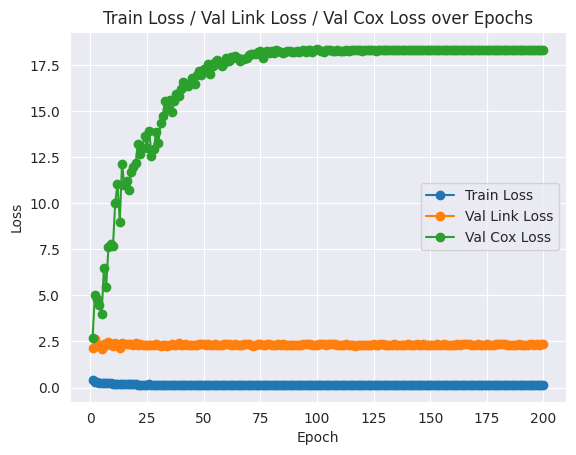

In [4]:
plt.figure()
plt.plot(df["epoch"], df["final_train_loss"], marker='o', linewidth=1.5)
plt.plot(df["epoch"], df["final_val_link_loss"], marker='o', linewidth=1.5)
plt.plot(df["epoch"], df["final_val_cox_loss"], marker='o', linewidth=1.5)
plt.title("Train Loss / Val Link Loss / Val Cox Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Val Link Loss", "Val Cox Loss"])
plt.grid(True)

# --- 2) Plot Link Prediction AUCs ---

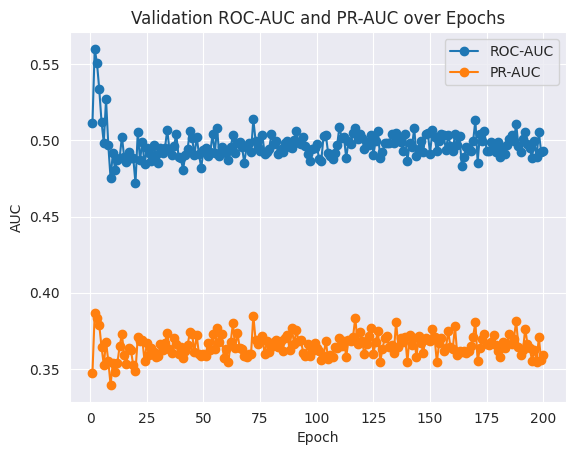

In [5]:
plt.figure()
plt.plot(df["epoch"], df["final_val_link_auc"],  marker='o', linewidth=1.5)
plt.plot(df["epoch"], df["final_val_pr_auc"],    marker='o', linewidth=1.5)
plt.title("Validation ROC-AUC and PR-AUC over Epochs")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend(["ROC-AUC", "PR-AUC"])
plt.grid(True)

# --- 3) Plot Mean C-Index ---

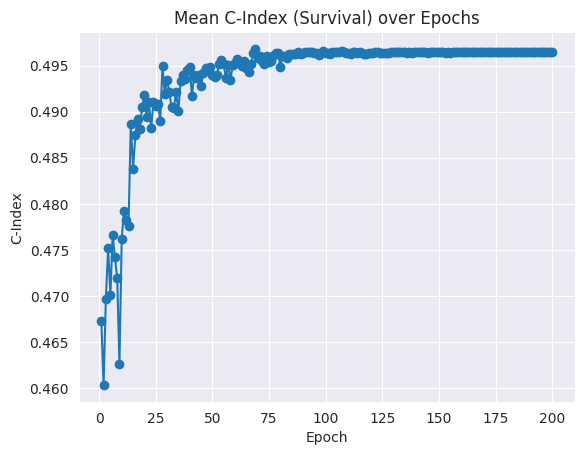

In [6]:
plt.figure()
plt.plot(df["epoch"], df["mean_c_index"], marker='o', linewidth=1.5)
plt.title("Mean C-Index (Survival) over Epochs")
plt.xlabel("Epoch")
plt.ylabel("C-Index")
plt.grid(True)

# --- 4) Per-Condition C-Index and PR-AUC Trends ---

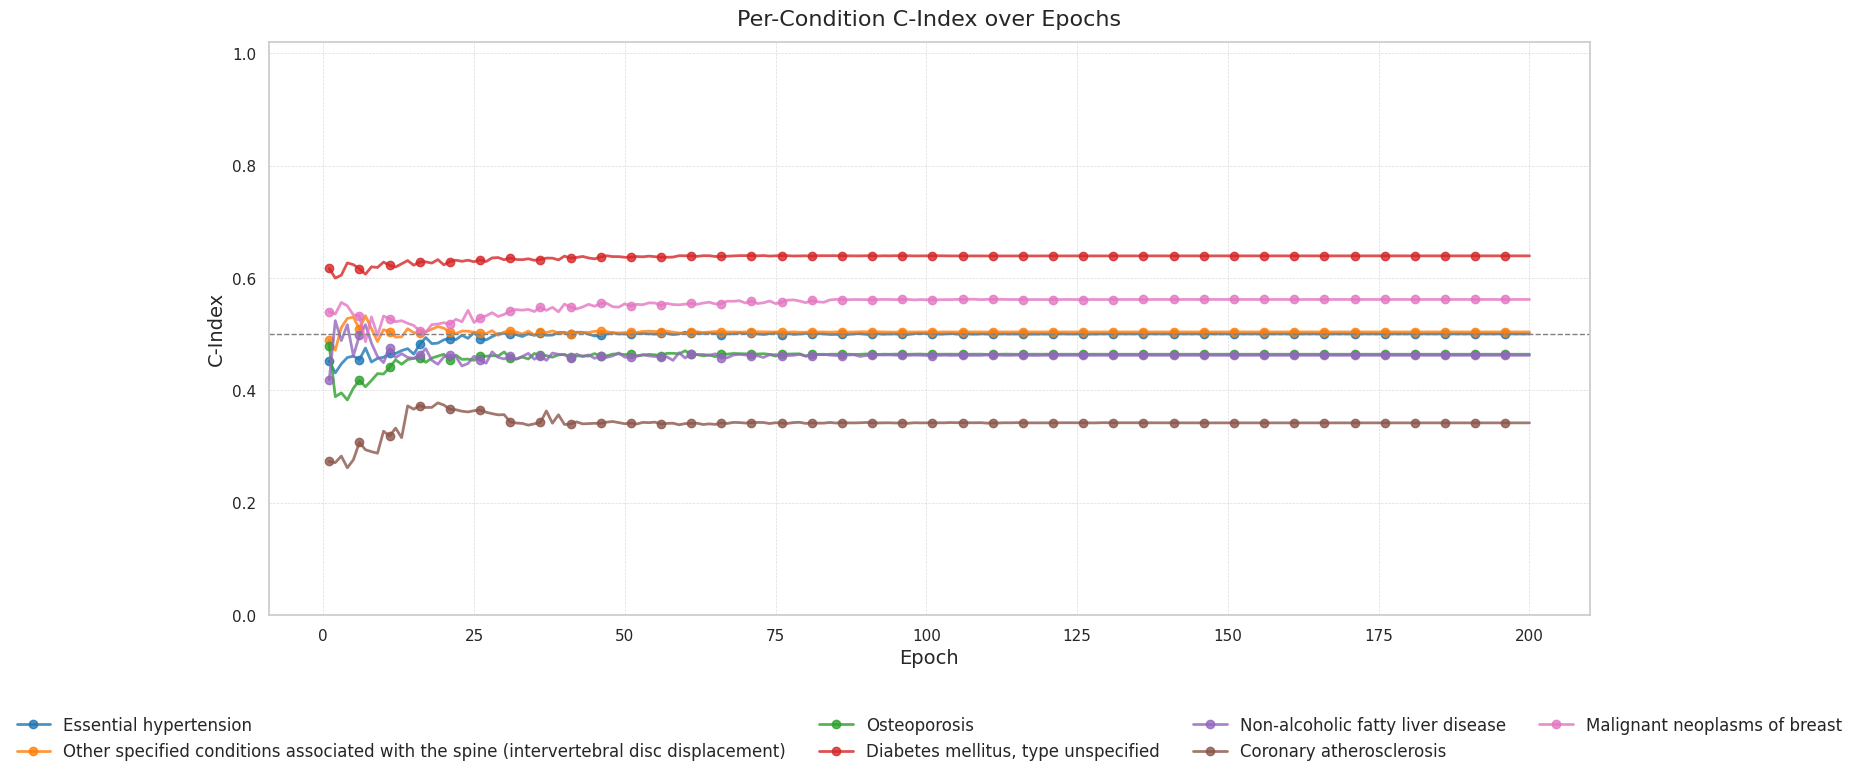

In [7]:
sns.set(style="whitegrid", context="notebook", palette="tab10")

# make it taller: height 8? instead of 6?
fig, ax = plt.subplots(figsize=(18, 8))

for cond_idx in cidx_df.columns:
    ax.plot(
        cidx_df.index,
        cidx_df[cond_idx],
        label=chosen[cond_idx],  # use real names
        linewidth=2,
        marker='o',
        markersize=6,
        markevery=5,
        alpha=0.8,
    )

# dashed 0.5 reference line
ax.axhline(0.5, color='gray', linestyle='--', linewidth=1)

# titles and labels
ax.set_title("Per-Condition C-Index over Epochs", fontsize=16, pad=12)
ax.set_xlabel("Epoch", fontsize=14)
ax.set_ylabel("C-Index", fontsize=14)

# fix y-range
ax.set_ylim(0.0, 1.02)

# subtle dashed grid
ax.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# legend below, no frame
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=4,
    frameon=False,
    fontsize=12
)

plt.tight_layout()
plt.show()

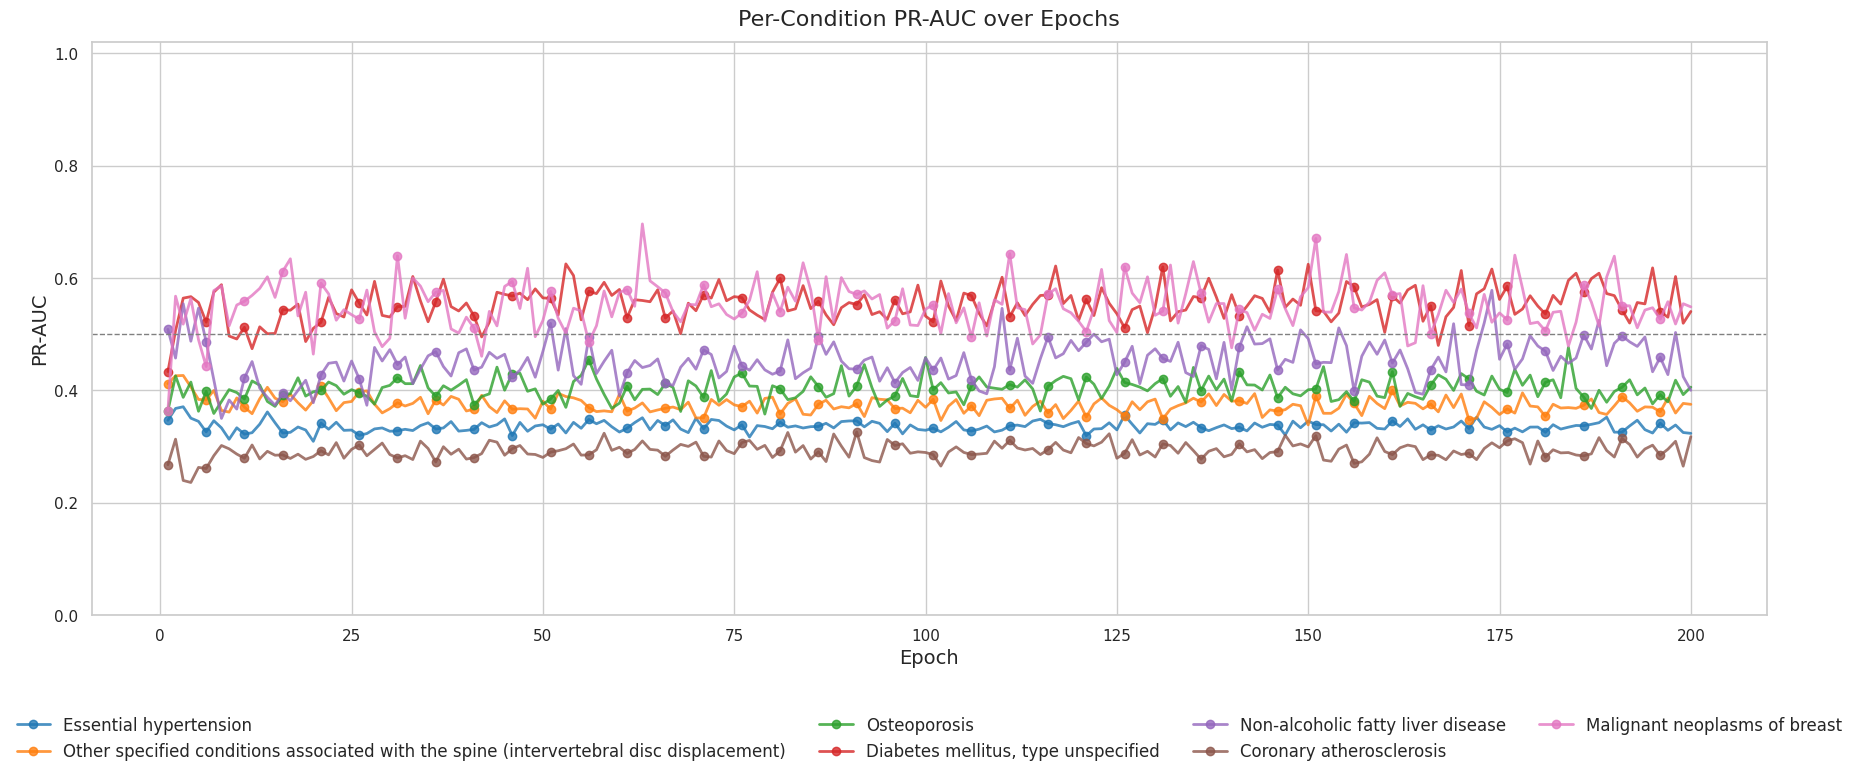

In [8]:
# assume `chosen` is your list of condition names, length == number of columns in prauc_df
sns.set(style="whitegrid", context="notebook", palette="tab10")

# make it taller to spread the lines out
fig, ax = plt.subplots(figsize=(20, 8))

for cond_idx in prauc_df.columns:
    ax.plot(
        prauc_df.index,
        prauc_df[cond_idx],
        label=chosen[cond_idx],   # use the real condition names
        linewidth=2,
        marker='o',
        markersize=6,
        markevery=5,
        alpha=0.8,
    )

# dashed reference at 0.5
ax.axhline(0.5, color='gray', linestyle='--', linewidth=1)

# Titles and labels
ax.set_title("Per-Condition PR-AUC over Epochs", fontsize=16, pad=12)
ax.set_xlabel("Epoch", fontsize=14)
ax.set_ylabel("PR-AUC", fontsize=14)

# fix y-range
ax.set_ylim(0.0, 1.02)


# legend below the plot
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=4,
    frameon=False,
    fontsize=12
)

plt.tight_layout()
plt.show()

# --- 5) Display raw DataFrame for inspection ---

In [62]:
df.columns

Index(['final_train_loss', 'final_val_link_loss', 'final_val_link_auc',
       'final_val_pr_auc', 'final_val_cox_loss', 'c_indices_per_condition',
       'pr_auc_per_condition', 'mean_c_index', 'epoch', 'NEGATIVE_MULTIPLIER',
       'timestamp'],
      dtype='object')

In [63]:
df.head()

,final_train_loss,final_val_link_loss,final_val_link_auc,final_val_pr_auc,final_val_cox_loss,c_indices_per_condition,pr_auc_per_condition,mean_c_index,epoch,NEGATIVE_MULTIPLIER,timestamp
0,0.718993,1.570637,0.875555,0.663555,5.490880,"[0.8531998651507152, 0.8950999682195468, 0.839...","[0.7030992509768312, 0.5148361273232431, 0.585...",0.875743,1,3,2025-05-12T12:44:25.960656
1,0.651588,1.396834,0.867989,0.705425,5.088103,"[0.8594268138115975, 0.8658257309504225, 0.838...","[0.763070551390516, 0.6332581668437889, 0.5892...",0.874172,2,3,2025-05-12T12:45:36.679850
2,0.632121,1.874671,0.874705,0.713606,5.059171,"[0.8553400940204509, 0.8822744522545427, 0.858...","[0.664349599488349, 0.7125327156432033, 0.6080...",0.891156,3,3,2025-05-12T12:46:45.074546
3,0.604673,1.364854,0.879859,0.738424,4.940975,"[0.857717220282445, 0.8831063523517535, 0.8741...","[0.7121496994442659, 0.6552884067686698, 0.764...",0.896376,4,3,2025-05-12T12:47:56.945589
4,0.604745,2.380382,0.848431,0.643253,4.918313,"[0.8552393886512721, 0.891010571674269, 0.8880...","[0.587854052774811, 0.5438957238693912, 0.6823...",0.902071,5,3,2025-05-12T12:49:12.711882
